<a href="https://colab.research.google.com/github/Matinnorouzi2023/Python/blob/master/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project - Medical Data Analysis

1. Problem
Analyze the patients past data containing vital signs to  extract insights which separates the survivor and non-survivor patients.

2.	Data
The dataset which was used for analysis here is taken from the mimic website. But the dataset is not in the correct format which we want, after some manipulation we get the data ready for the analysis.

3.  Approach
- To protect patient confidentiality date and time is shifted to future that's not the actual time so from shifted  time column we create an extra column hours which tells us the time passed in hours since first observation in ICU.
- After all manipulation our final dataset contain vital signs values for each observation of  patients with time  in separate column  and also the label fo Death(0 or 1) in another column.
- There are two options to deal with missing values
1.Drop all rows which contain null values.
2.Fill the missing values by some method using pandas.
I can't go with 1st option because major part of data has missing values. so I decided to go with second option and fill missing values with the average of upper and lower values.
But before that I filtered the data and take only those patients data who died in hospital or survive.
- After performing EDA which also include the removal of some impossible outliers, we come up with a result of Analysis.


5.Impact
This result helps to build a early warning system which predict the condition of patients on the basis of their score ,calculated on their condition using vital sign values.

**Install necessary Libraries**

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 38.4MB 528kB/s
     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 1.1MB 11.1MB/s 
     |████████████████████████████████| 3.2MB 15.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 296kB 25.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=9f3af834bea31cb83397aa5d1d664783f67562a00c7844b2e2afb7f7c401fe3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-s9_d6wsl/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=1331e2d54cb4e77da605c4863e6c4142ef84ff7cb251fcd72040b2a2c6ead666
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=

**Import necessary Libraries**

In [ ]:
import time
import os
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np                  #use numpy and pandas for data pre- processing
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns               #use seaborn and matplotlib for data visualization
import warnings
from IPython import display
from tqdm import tqdm               #to check the progress of work
%matplotlib inline

warnings.filterwarnings("ignore")

In [ ]:
os.chdir('/content/drive/MyDrive/Medical-Data') #change the directory to the path where all the files located

We have two dataset one for patients normal info and other for patients vital signs detail(contain all observations for each patients)

In [ ]:
# patients_data = pd.read_excel('/content/drive/MyDrive/Medical-Data/med-data-patients.xlsx')
# patients_detail_data = pd.read_csv('/content/drive/MyDrive/Medical-Data/med-data-details.csv',names=["SUBJECT_ID", "EVENT_ID", "Vital_Signs", "Time","Rate in text","Rate","Unit"], parse_dates=['Time'])

In [ ]:
patients_data = pd.read_csv('patients_data.csv',index_col = 0)
patients_detail_data = pd.read_csv('patients_detail_data.csv', parse_dates=['Time'],index_col = 0)

In [ ]:
display.display(patients_data.head())
display.display(patients_detail_data.head())

SUBJECT_ID  ICUSTAY_ID  DIED_IN_HOSPITAL  DIED      LOS
0         268      280836                 1     1  77.9760
1         269      206613                 0     0  78.6912
2         270      220345                 0     0  69.4536
3         271      249196                 0     0  49.4400
4         272      210407                 0     0  38.8848

SUBJECT_ID  ICUSTAY_ID                Time  ...      Unit ERROR  Vital_Signs
0          36    241249.0 2134-05-12 13:00:00  ...       bpm   0.0      LAST_HR
1          36    241249.0 2134-05-12 13:00:00  ...  insp/min   0.0           RR
2          36    241249.0 2134-05-12 13:00:00  ...         %   0.0         SA02
3          36    241249.0 2134-05-12 14:00:00  ...       bpm   0.0      LAST_HR
4          36    241249.0 2134-05-12 14:00:00  ...  insp/min   0.0           RR

[5 rows x 7 columns]

# Data Preprocessing

In our dataset data and time is shifted to future thats not the actual time so from this column we create an extra column hours which tells us the time passed in hours since first observation in ICU

In [ ]:
patients_detail_data['hours']= (patients_detail_data['Time']-
             patients_detail_data.groupby('ICUSTAY_ID')['Time'].transform('min'))
patients_detail_data['hours'] =patients_detail_data['hours']/ np.timedelta64(1, 'h')

patients_detail_data.sort_values(['SUBJECT_ID', 'ICUSTAY_ID','hours'], ascending=[True, True, True],inplace=True)  # sort the values w.r.t hours for each patient(SUBJECT_ID)

In [ ]:
patients_detail_data.head()

SUBJECT_ID  ICUSTAY_ID                Time  ...  ERROR Vital_Signs     hours
49          23    234044.0 2157-10-21 12:05:00  ...    0.0           T  0.000000
50          23    234044.0 2157-10-21 12:06:00  ...    0.0     LAST_HR  0.016667
51          23    234044.0 2157-10-21 12:06:00  ...    0.0          RR  0.016667
52          23    234044.0 2157-10-21 12:07:00  ...    0.0        SA02  0.033333
53          23    234044.0 2157-10-21 12:08:00  ...    0.0     LAST_HR  0.050000

[5 rows x 8 columns]

In [ ]:
patients_detail_data.drop(patients_detail_data[patients_detail_data['ERROR'] == 1].index, inplace = True)


Now all the vital signs name are contained in same column and their values are stored parallely in other column named 'Rate'. To analyze the dataset clearly we have to create one new datset derived from two existing dataset.In new dataset each vital signs has a seperate column and the values in it is the rate for that vital sign.Also merge few important columns(died,icu_stay) from first dataset

In [ ]:
table = pd.pivot_table(patients_detail_data, values ='Rate', index =['SUBJECT_ID','ICUSTAY_ID','hours'],
                         columns =['Vital_Signs'])
table.head()

In [ ]:
table.reset_index(inplace=True)   #we have to reset indexing.
table = table.merge(patients_data[['SUBJECT_ID','ICUSTAY_ID','DIED','DIED_IN_HOSPITAL','LOS']],on =['SUBJECT_ID','ICUSTAY_ID'])  #merge the columns from first dataset
table.head()

SUBJECT_ID  ICUSTAY_ID     hours  ...  DIED  DIED_IN_HOSPITAL      LOS
0          23    234044.0  0.000000  ...     0                 0  28.4688
1          23    234044.0  0.016667  ...     0                 0  28.4688
2          23    234044.0  0.033333  ...     0                 0  28.4688
3          23    234044.0  0.050000  ...     0                 0  28.4688
4          23    234044.0  0.166667  ...     0                 0  28.4688

[5 rows x 11 columns]

In [ ]:
table.dropna().shape[0]  #return total no of rows that does not contain any null value

232251

There are two options to deal with missing values

1. Drop all rows which contain null values.
2. Fill the missing values by some method using pandas.

We can't go with 1st option because major part of data has missing values. so we have to go with second option and fill missing values with the average of upper and lower values.

But before that we filter the data and take only those patients data who died in hospital or survive.


In [ ]:
df = table[table['DIED']==table['DIED_IN_HOSPITAL']]
df.reset_index(drop= True,inplace=True)
df['SUBJECT_ID'].nunique()

16306

# Exploratary Data Analysis (EDA)

In [ ]:
df.sort_values(['SUBJECT_ID','ICUSTAY_ID', 'hours'], ascending=[True, True, True],inplace=True)
#df.to_csv('df.csv') #save the data which will be analyzed
df['ICUSTAY_ID'].nunique()

21617

In [ ]:
df['SUBJECT_ID'].nunique()

16306

In [ ]:
profile = ProfileReport(df)
profile.to_file("medical_report.html")

Now only 16306 patients and 21617 icu stays are remaining in our dataset

We already saw the amount of missing data for every column, but we still do not know how much information is missing at the patient level. In order to do so, we are going to aggregate data by ICU stay and look at the number of non-null values, using the 'groupby' function together with the 'mean' operator. This will give an indication of how many ICU stays have at least one observation for each variable.

We will consider every ICU stay as an independent sample.

In [ ]:
print(df.groupby(['ICUSTAY_ID']).mean().info(null_counts=1))

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21617 entries, 200001.0 to 299979.0
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBJECT_ID        21617 non-null  int64  
 1   hours             21617 non-null  float64
 2   LAST_HR           21614 non-null  float64
 3   LAST_SBP          9211 non-null   float64
 4   RR                21602 non-null  float64
 5   SA02              21592 non-null  float64
 6   T                 21497 non-null  float64
 7   DIED              21617 non-null  int64  
 8   DIED_IN_HOSPITAL  21617 non-null  int64  
 9   LOS               21617 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.8 MB
None


In [ ]:
#df =df.groupby('SUBJECT_ID').apply(lambda group: group.interpolate(limit_direction = 'both')) # filling missing values

In [ ]:
print("patients with LAST_HR measurement", df[(df['LAST_HR']>0)]['SUBJECT_ID'].nunique())  # check no of patient whose HR is measured
print("patients with LAST_SBP measurement",df[(df['LAST_SBP']>0)]['SUBJECT_ID'].nunique())  # check no of patient whose SBP is measured
print("patients with RR measurement", df[(df['RR']>0)]['SUBJECT_ID'].nunique())  # check no of patient whose RR is measured
print("patients with SA02 measurement", df[(df['SA02']>0)]['SUBJECT_ID'].nunique())  # check no of patient whose oxygen saturation is measured
print("patients with T measurement", df[(df['T']>0)]['SUBJECT_ID'].nunique())  # check no of patient whose T is measured


patients with LAST_HR measurement 16303
patients with LAST_SBP measurement 8220
patients with RR measurement 16297
patients with SA02 measurement 16289
patients with T measurement 16211


There are still many missing values in the dataset because vital signs have not even been measured for many patients.

In [ ]:
df = df.round({'LAST_HR':0,'LAST_SBP':0,'RR':0,'SA02':0,'T':3},)
df.head()

SUBJECT_ID  ICUSTAY_ID     hours  ...  DIED  DIED_IN_HOSPITAL      LOS
0          23    234044.0  0.000000  ...     0                 0  28.4688
1          23    234044.0  0.016667  ...     0                 0  28.4688
2          23    234044.0  0.033333  ...     0                 0  28.4688
3          23    234044.0  0.050000  ...     0                 0  28.4688
4          23    234044.0  0.166667  ...     0                 0  28.4688

[5 rows x 11 columns]

Text(0, 0.5, 'Number of patients')

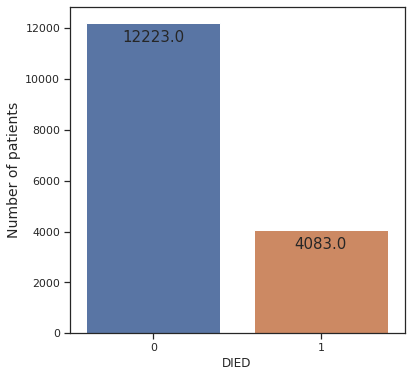

In [ ]:
fig = plt.figure(figsize=(6,6))
sns.set(style="ticks")
splot = sns.countplot(x='DIED', data = df[['SUBJECT_ID','DIED']].drop_duplicates())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   size=15,
                   xytext = (0, -15),
                   textcoords = 'offset points')

plt.ylabel("Number of patients", size=14)


Here we can see out of 16306 patients 4083 was died and remaining 12223 are survivors. It also show that the data is imbalanced so later we have to balance dataset when training a machine learning model .

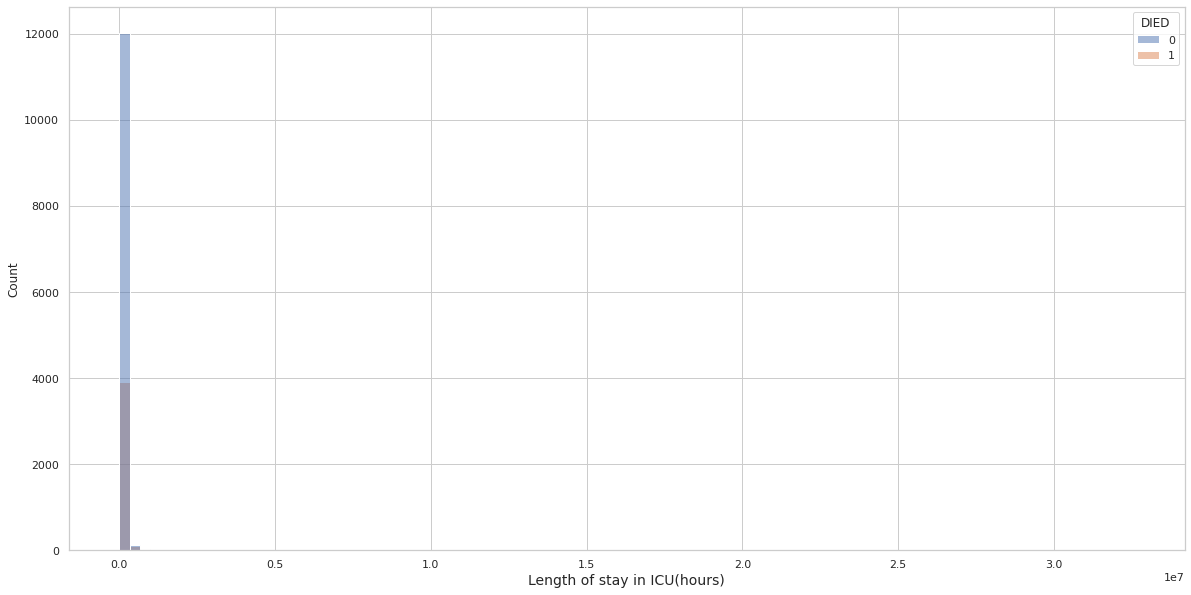

In [ ]:

los =(df[['SUBJECT_ID','DIED','LOS']].groupby(['SUBJECT_ID','DIED']).sum()).reset_index()

fig = plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
ax =sns.histplot( x='LOS',hue ='DIED', data=los,bins = 100)
plt.xlabel("Length of stay in ICU(hours)", size=14)
plt.show()


Seeing the same pattern in both classes but in death case less number of patients are present because the data is imbalanced.

And also the graph implies that the death case is not affected by the patient's length of stay.

This graph tells us most of the patients under observation for less than 500 hours(20 days)

## Outliers
Using the 'seaborn' library and the 'boxplot' function we can easily create one boxplot for every variable.

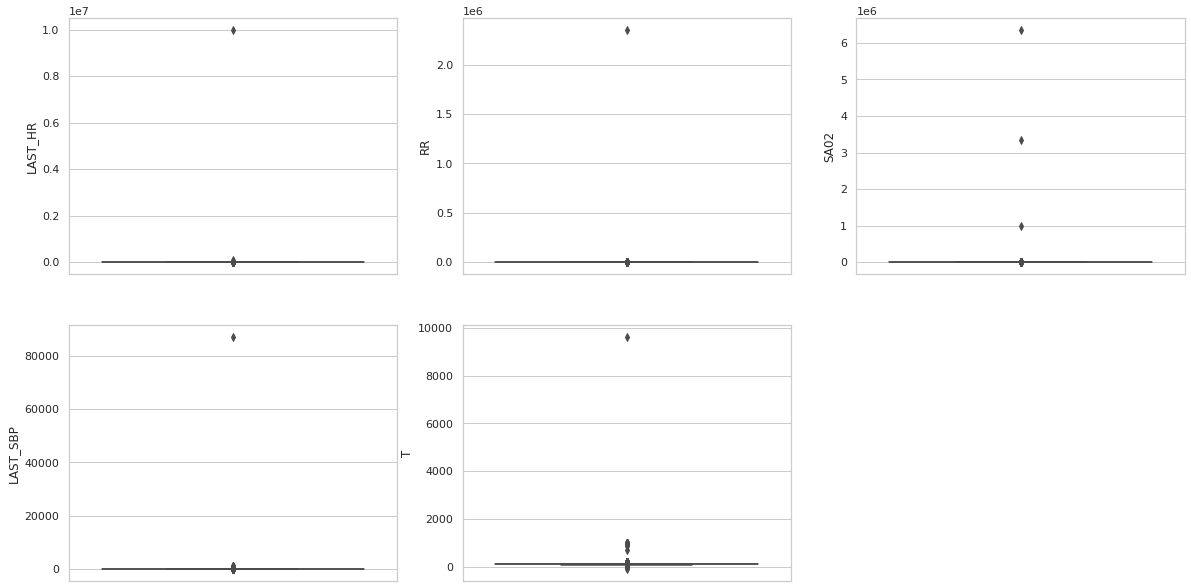

In [ ]:
variables = ['LAST_HR', 'RR', 'SA02', 'LAST_SBP', 'T'] #contain vital sign
variables_mort = variables.copy()
variables_mort.append('DIED')

fig = plt.figure(figsize=(20,16))
count = 0
for variable in variables:
    count += 1
    plt.subplot(3, 3, count)

    ax = sns.boxplot(y=variable, data=df)
plt.show()     # check the distribution of data

The outliers are so deviant from the norm that it is not even possible to visualize the distribution of data (minimum, first quartile, median, third quartile, maximum) using boxplots.

In [ ]:
nulls_before = df.isnull().sum().sum()



df.loc[df['LAST_HR']>400, 'LAST_HR'] = np.nan
df.loc[df['LAST_HR']<0, 'LAST_HR'] = np.nan
df.loc[df['LAST_SBP']>250,  'LAST_SBP'] = np.nan
df.loc[df['LAST_SBP']<0,  'LAST_SBP'] = np.nan
df.loc[df['T']>110, 'T'] = np.nan
df.loc[df['T']<30, 'T'] = np.nan
df.loc[df['RR']>90, 'RR'] = np.nan
df.loc[df['SA02']>100, 'SA02'] = np.nan
df.loc[df['SA02']<0, 'SA02'] = np.nan

nulls_now = df.isnull().sum().sum()
print('Number of observations removed: ' + str(nulls_now - nulls_before))
print('Observations corresponding to outliers: ' + str(round((nulls_now - nulls_before)*100/df.shape[0],2)) + '%')

Number of observations removed: 498
Observations corresponding to outliers: 0.02%


## After Outlier(anamolies) Exclusion

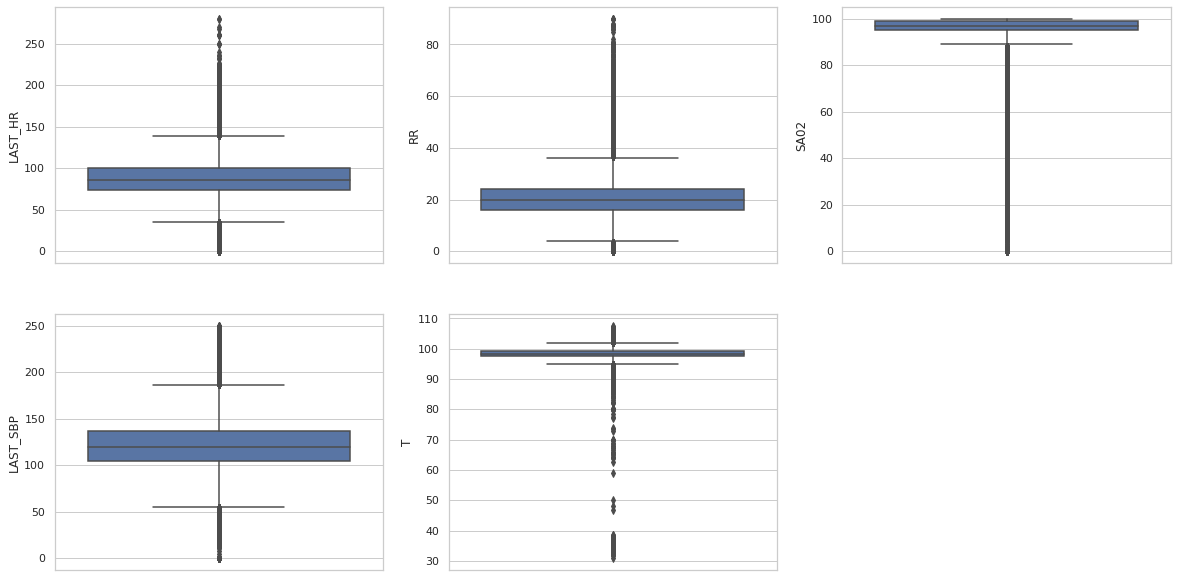

In [ ]:
variables = ['LAST_HR', 'RR', 'SA02', 'LAST_SBP', 'T'] #contain vital sign
variables_mort = variables.copy()
variables_mort.append('DIED')

fig = plt.figure(figsize=(20,16))
count = 0
for variable in variables:
    count += 1
    plt.subplot(3, 3, count)

    ax = sns.boxplot(y=variable, data=df)
plt.show()     # check the distribution of data

In [ ]:
col = ['hours',	'LAST_HR', 'LAST_SBP',	'RR',	'SA02',	'T',	'DIED']
profile = ProfileReport(df[col], title="final Pandas Profiling Report")
profile.to_file("final_medical_report.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

We excluded some of the outlier (anomalies) from the dataset. Now in this section we are going to infer very important insights about the patient condition.

In [ ]:
last_data = df.groupby(['SUBJECT_ID','ICUSTAY_ID']).apply(lambda x: x.iloc[-1]).set_index(['SUBJECT_ID','ICUSTAY_ID']) #It takes only the last observation for each patient
# r = df[variables]
# fig, ax = plt.subplots(figsize=(20,8))
# plt.subplot(1,2,1)
# ax =sns.heatmap(r.corr(),annot=True, center=0, cmap='Blues')
# ax.set_title('Multi-Collinearity of Vital signs for all observation')
# plt.subplot(1,2,2)
# ax =sns.heatmap(last_data[variables].corr(),annot = True, center=0, cmap='Blues')
# ax.set_title('Multi-Collinearity of Vital signs for last observation of each patient')
# plt.show()

### Individual distribution plot of vital signs

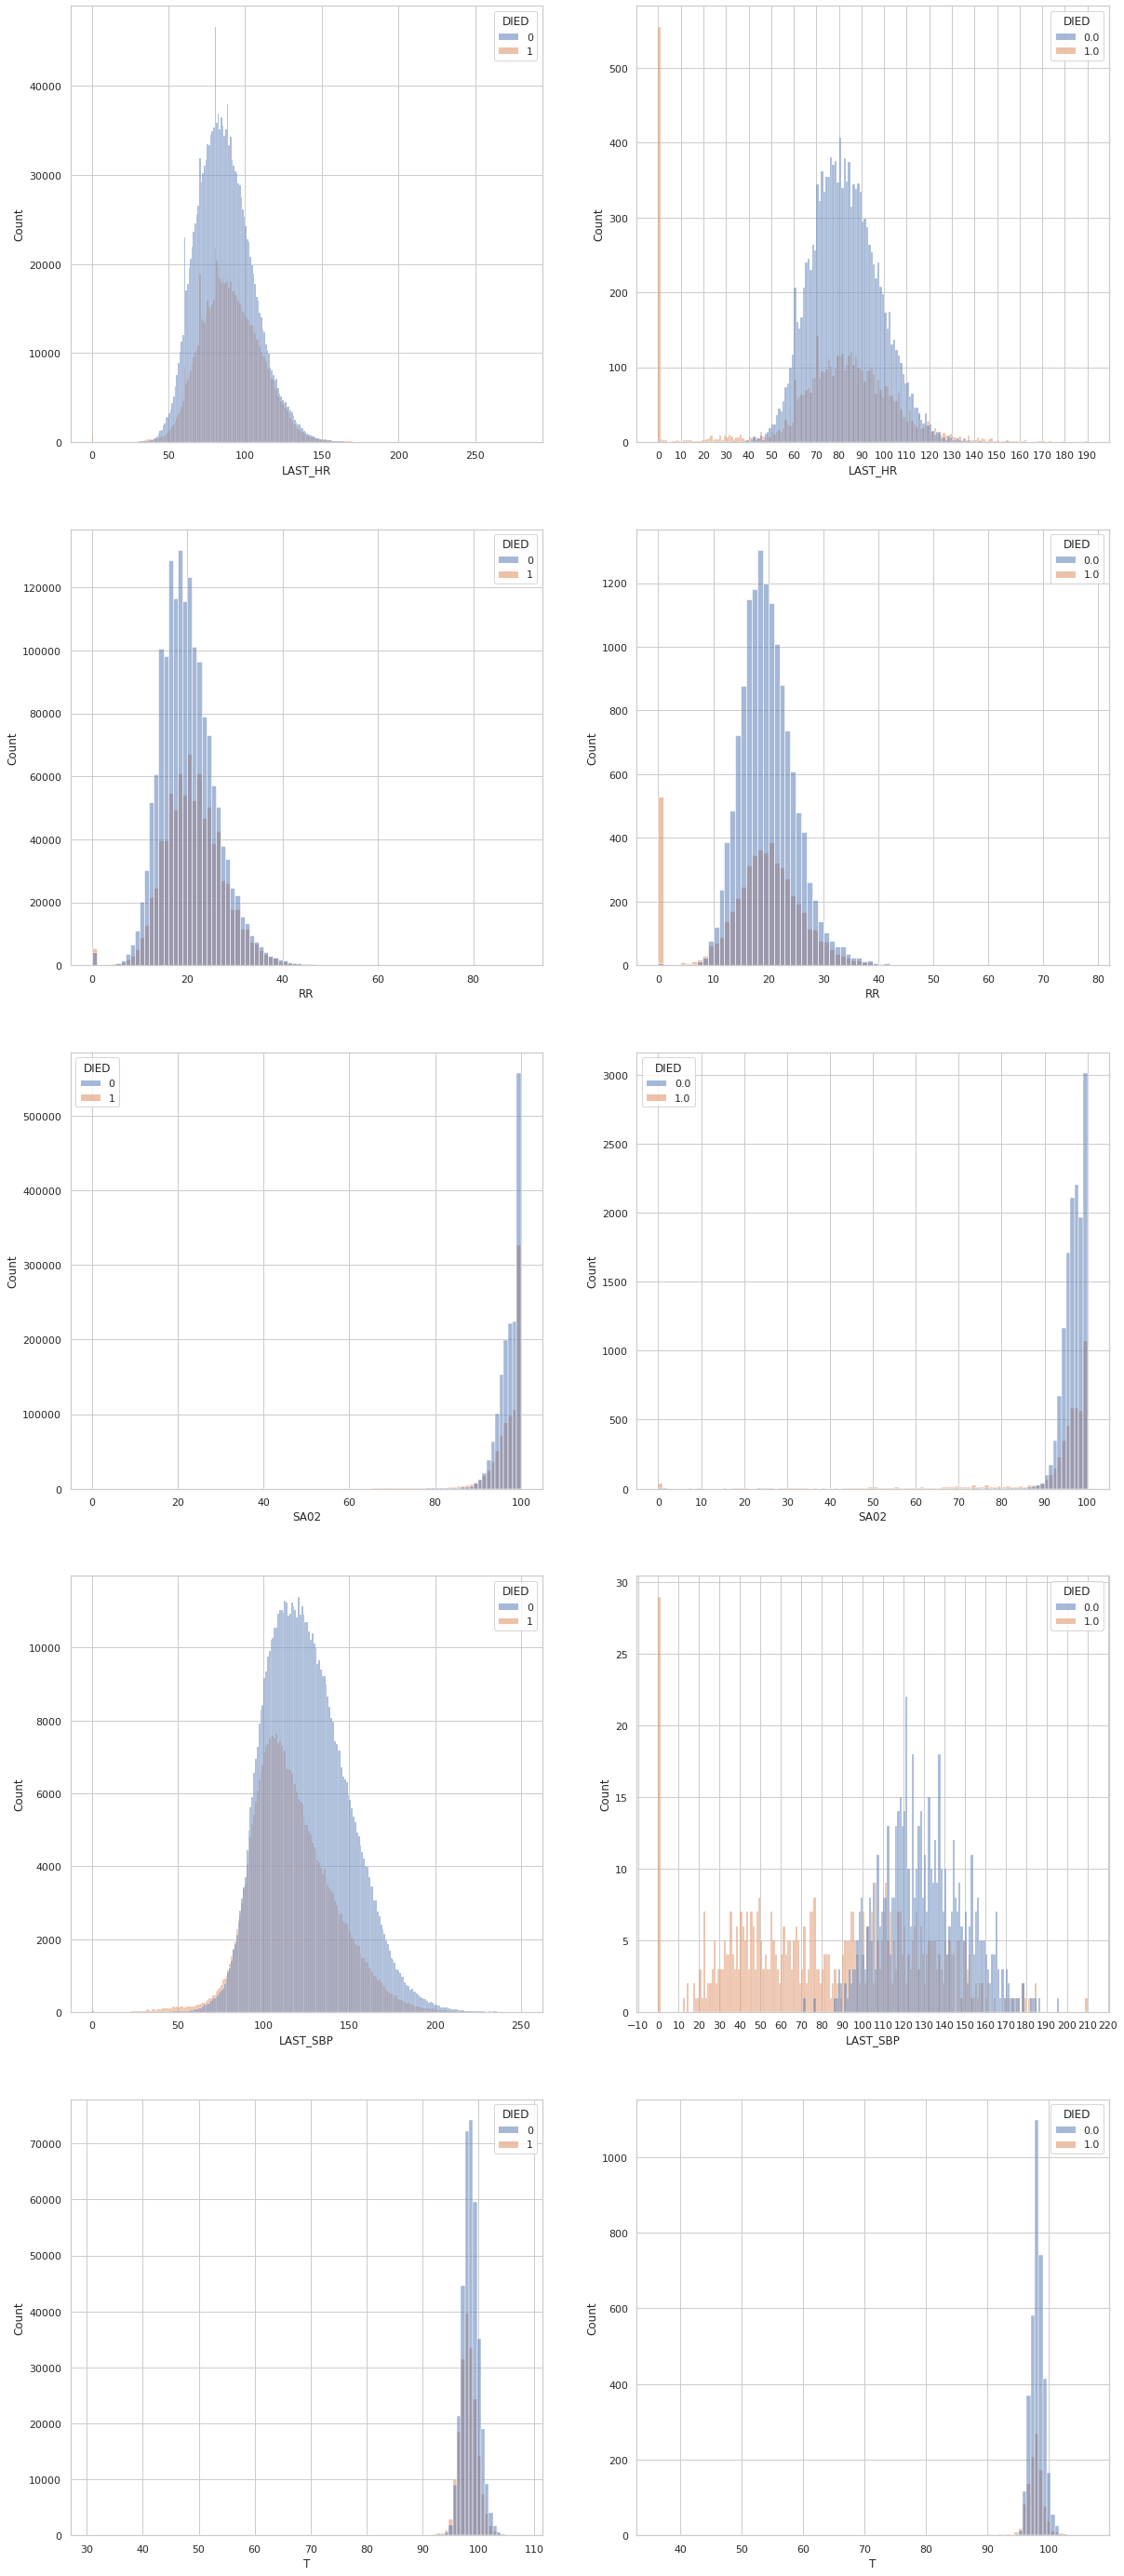

In [ ]:
fig, ax = plt.subplots(figsize=(20,50))
sns.set_style('whitegrid')
c=0
for i in range(len(variables)):
  c= c+1
  plt.subplot(5, 2, c)
  ax = sns.histplot( x= variables[i], hue = 'DIED',data = df, bins=int(df[variables[i]].max()))
  c=c+1
  plt.subplot(5,2,c)
  ax = sns.histplot( x= variables[i], hue = 'DIED',data = last_data, bins=int(last_data[variables[i]].max()))
  ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
  #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())


plt.show()

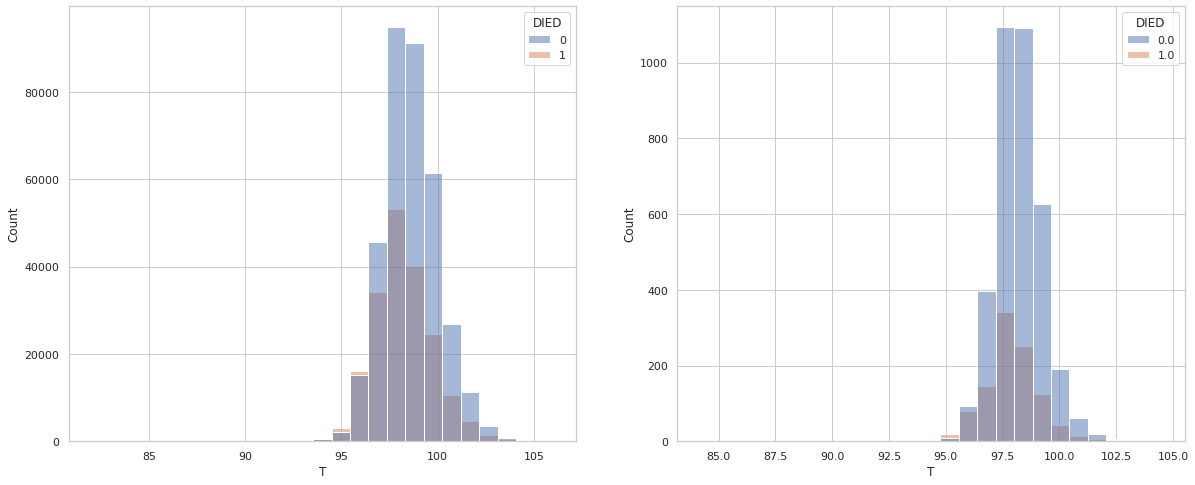

In [ ]:
ax =plt.subplots(figsize = (20,8))
plt.subplot(1,2,1)
ax=sns.histplot(x='T',hue='DIED',data = df[(df['T']>80) & (df['T']<106)], bins = 25)
plt.subplot(1,2,2)
ax=sns.histplot(x='T',hue='DIED',data = last_data[(last_data['T']>80) & (last_data['T']<=106)], bins = 25)
plt.show()

**HEART RATE**

Normal Range:
`60-110`

Slightly Danger zone:
`110-120`, `60-50`

Danger Zone:
`120<HR<130`, `50>HR>40`

Critical Zone:
 `HR<40 and HR>130`,

**RESPIRATORY RATE**

Normal Range:
`16<RR<25`

Slightly Danger zone:
`25<RR<30`, `11<RR<16`

Danger Zone:
`30<RR<38`, `11>RR>8`

Critical Zone:
 `RR<8 and RR>38`,

**SYSTOLIC BLOOD PRESSURE**

Normal Range:
`105<RR<=180`

Slightly Danger zone:
`90<=SBP<=105`, `180<RR<=200`

Danger Zone:
`85<=SBP<90`

Critical Zone:
 `SBP<85 and SBP>200`,

**OXYGEN SATURATION**

Normal Range:
`95<SAO2<=100`

Slightly Danger zone:
`90<=SAO2<=95`

Danger Zone:
`80<=SAO2<90`

Critical Zone:
 `SAO2<80`

**BODY TEMPRATURE**

Normal Range:
`96<F<=99`





### Pair-plot for the vital signs.

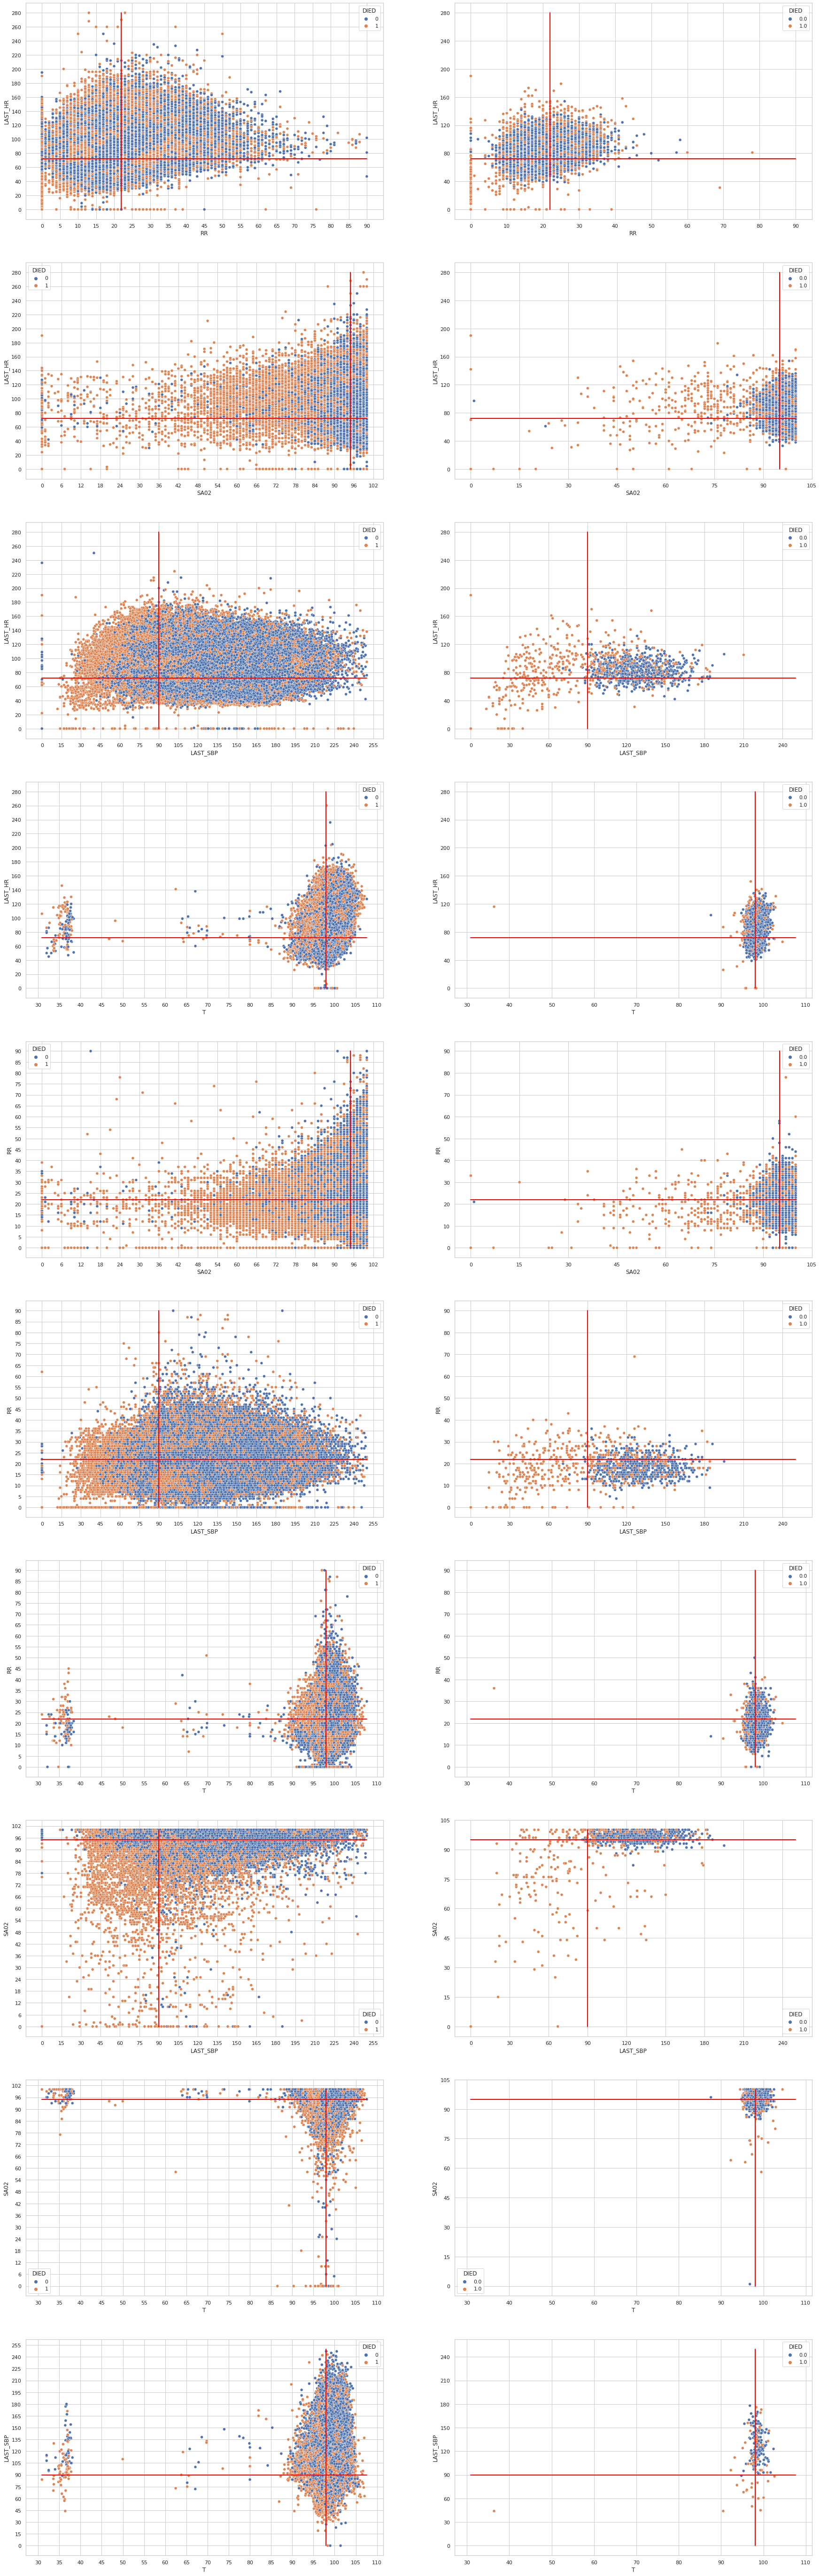

In [ ]:
value = {'LAST_HR':72,'RR':22,'LAST_SBP': 90,'SA02':95, 'T':98}
fig, ax = plt.subplots(figsize=(30,100))

sns.set_style('whitegrid')

c=0
for i in range(len(variables)):
  for j in range(i+1,len(variables)):
    c= c+1
    plt.subplot(10, 2, c)
    ax = sns.scatterplot(y = variables[i], x= variables[j], hue = 'DIED',data = df)
    plt.plot([value[variables[j]], value[variables[j]]], [df[variables[i]].min(), df[variables[i]].max()], linewidth=2,color = 'red')
    plt.plot([df[variables[j]].min(), df[variables[j]].max()], [value[variables[i]], value[variables[i]]], linewidth=2,color = 'red')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(20))

    c=c+1
    plt.subplot(10,2,c)
    ax = sns.scatterplot(y = variables[i], x= variables[j], hue = 'DIED',data = last_data)
    plt.plot([value[variables[j]], value[variables[j]]], [df[variables[i]].min(), df[variables[i]].max()], linewidth=2,color = 'red')
    plt.plot([df[variables[j]].min(), df[variables[j]].max()], [value[variables[i]], value[variables[i]]], linewidth=2,color = 'red')
    ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(10))


plt.show()

Earlier we saw the charts for individual now here all the pair charts are showing the relation ship with each other. Below ranges leave those ranges which we discussed earlier in individual chart.

**HR vs RR**

*   Risk

    *  `30<RR<40` and `70<HR<90`
    *  `25<=RR<=30` and `50<HR<80`
    *  `7<RR<15` and `70<HR<90`

**HR vs SAO2**

*  Oxygen Saturation is more important than the heart rate, patients with `SAO2<80% ` are in critical condition despite of heart rate in normal range. Oxygen Saturation need more attention than heart rate.

**HR vs T**

*   Risk

    *  `T<98` and `70<HR`
    *  `T>103` and `70<HR`

**HR vs SBP**

*   Risk

    *  `SBP<90` and `∀ HR`

**RR vs SBP**

*  Risk

  *   `7<RR<15` and `90<SBP<105`
  *    `∀ R` and `SBP<70`

**RR vs T**

*  Risk

  *   `RR>17` and `T<97`
  *   `8<RR<15` and `98<T<101`
  *    `∀ RR` and `T>105`

**SBP vs SAO2**

*  Risk

  *   `SBP<90` and `SAO2<90`
  *   `30<SBP<60` and `90<=SAO2`
  *    `∀ SBP` and `SAO2<75`


**SA02 vs T**

*  Risk

  *  `SAO2>84` and `92<T<97`
  *  `SAO2<78`


**SBP vs T**

*  Risk

  *  `75<SBP<120` and `88<T<97`
  *  `SBP<75` and `T<98`


### Detect anomaly observations individually

In [ ]:
last_data[((last_data['LAST_HR']<40) | (last_data['LAST_HR']>130)) & (last_data['DIED']==0)]

hours  LAST_HR  ...  DIED_IN_HOSPITAL       LOS
SUBJECT_ID ICUSTAY_ID                       ...                            
8799.0     270370.0     50.333333    133.0  ...               0.0   51.8568
43970.0    288134.0     17.766667     36.0  ...               0.0   24.0000
45184.0    206276.0    127.200000    131.0  ...               0.0  128.1192
45576.0    284811.0    639.333333    135.0  ...               0.0  642.2352
46150.0    228044.0     43.950000    141.0  ...               0.0   47.0064
46189.0    240721.0     28.933333     38.0  ...               0.0   29.8440
48779.0    280431.0     16.716667    135.0  ...               0.0   18.2784
49339.0    275016.0     36.283333    154.0  ...               0.0   41.9016
53802.0    208013.0     60.283333    132.0  ...               0.0   64.1568
54138.0    269240.0     26.283333     39.0  ...               0.0   28.5000
54935.0    234408.0     45.433333    137.0  ...               0.0   47.3880
59381.0    298538.0    287.766667    133.0  ...               0.0  288.3264
65091.0    272132.0    216.583333    137.0  ...               0.0  217.6392
72557.0    228913.0     99.116667    133.0  ...               0.0  100.1688
74835.0    241697.0     55.483333    135.0  ...               0.0   57.5664
75661.0    249909.0     21.150000    132.0  ...               0.0   24.2280
77930.0    242305.0     20.016667    131.0  ...               0.0   22.4256
80262.0    281507.0     74.000000     39.0  ...               0.0   76.0320
80317.0    212876.0     50.000000     33.0  ...               0.0   51.1560
83065.0    258909.0     45.283333    132.0  ...               0.0   46.2312
84685.0    297049.0      8.483333    142.0  ...               0.0   22.2768
85368.0    296025.0     11.916667     34.0  ...               0.0   18.1176
87275.0    252028.0     76.233333    133.0  ...               0.0   77.1816
87375.0    295784.0     46.333333     39.0  ...               0.0   47.2536
88602.0    243385.0     38.383333    136.0  ...               0.0   39.7464
89089.0    235045.0      9.650000    135.0  ...               0.0   12.4176
90959.0    240741.0     91.000000    135.0  ...               0.0   98.2800
91752.0    284821.0     45.866667    134.0  ...               0.0   48.4728
92001.0    212737.0      4.050000      0.0  ...               0.0    9.3360
92590.0    229695.0     46.550000    132.0  ...               0.0   51.0720
96017.0    272274.0     46.166667    144.0  ...               0.0   45.7128
97876.0    235289.0     34.450000    132.0  ...               0.0   37.3512
99790.0    290238.0     10.833333    142.0  ...               0.0   18.0792

[33 rows x 9 columns]

Why the person with HR: 0 (subject_ID 92001)  did not die?

In [ ]:
df[df['SUBJECT_ID']==92001.0]

SUBJECT_ID  ICUSTAY_ID  hours  ...  DIED  DIED_IN_HOSPITAL    LOS
2495192       92001    212737.0   0.00  ...     0                 0  9.336
2495193       92001    212737.0   0.05  ...     0                 0  9.336
2495194       92001    212737.0   1.05  ...     0                 0  9.336
2495195       92001    212737.0   2.05  ...     0                 0  9.336
2495196       92001    212737.0   3.05  ...     0                 0  9.336
2495197       92001    212737.0   4.05  ...     0                 0  9.336

[6 rows x 11 columns]

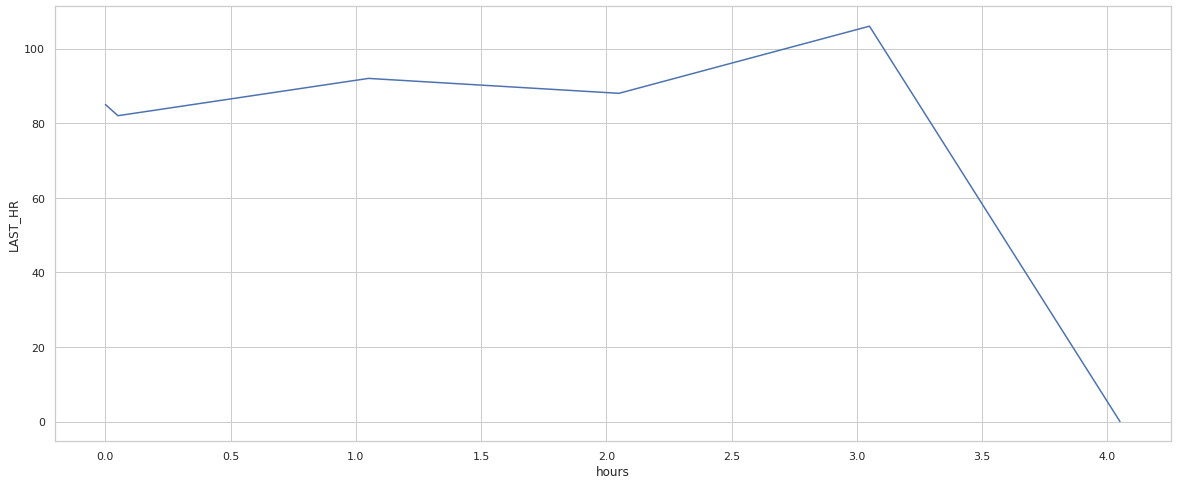

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(y='LAST_HR', x='hours' ,data= df[df['SUBJECT_ID']==92001.0])

In [ ]:
last_data[(last_data['RR']>8) & (last_data['DIED']==0)]

hours  LAST_HR  ...  DIED_IN_HOSPITAL       LOS
SUBJECT_ID ICUSTAY_ID                       ...                            
23.0       234044.0     27.916667     83.0  ...               0.0   28.4688
36.0       241249.0    103.133333     80.0  ...               0.0  104.3592
107.0      252542.0     24.900000     68.0  ...               0.0   25.9344
           264253.0     44.000000     88.0  ...               0.0   46.3512
154.0      201272.0     48.966667     81.0  ...               0.0   50.0616
...                           ...      ...  ...               ...       ...
99983.0    286606.0     23.983333     69.0  ...               0.0   24.9576
99985.0    279638.0    269.000000     97.0  ...               0.0  271.1952
99991.0    226241.0     72.966667     82.0  ...               0.0   75.4224
99992.0    242052.0     43.316667     94.0  ...               0.0   47.3880
99999.0    246512.0     25.133333     86.0  ...               0.0   26.9808

[15291 rows x 9 columns]

How the patients with RR: 0 (ICUSTAY_ID 283599,275166,266577,229063,294925,270872,285758) and RR: 2(270765,269229)alive ?

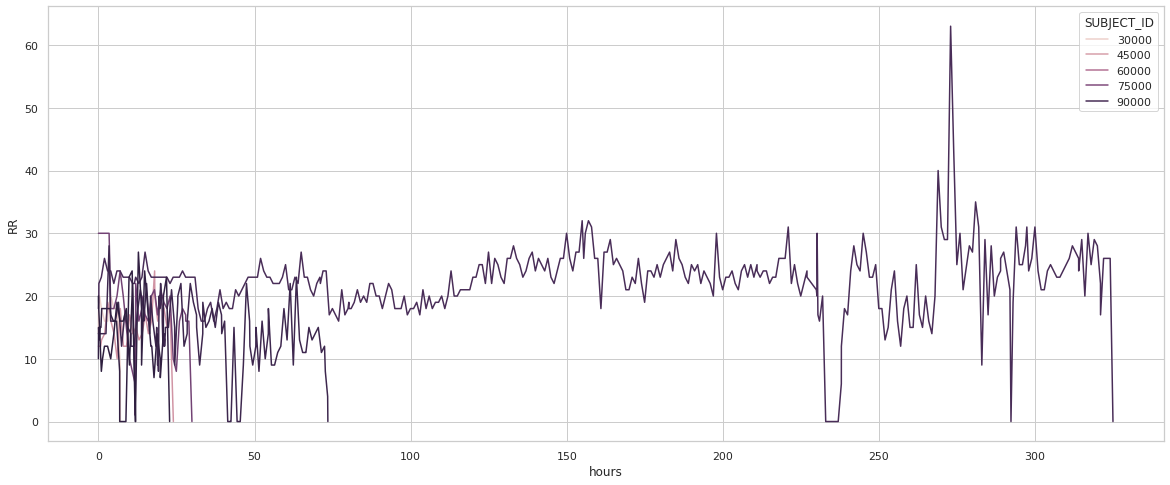

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data= df[df['ICUSTAY_ID'].isin([283599,275166,266577,229063,294925,270872,285758])],x='hours', y='RR',hue='SUBJECT_ID')

In [ ]:
last_data[last_data['hours']>=500]

hours  LAST_HR  ...  DIED_IN_HOSPITAL       LOS
SUBJECT_ID ICUSTAY_ID                       ...                            
124.0      256064.0    545.816667      0.0  ...               1.0  549.7800
1186.0     277612.0    667.400000     80.0  ...               0.0  672.6264
1709.0     207018.0    541.783333     91.0  ...               0.0  546.1584
2090.0     253288.0    837.283333     67.0  ...               0.0  846.2088
5242.0     232017.0    756.366667      0.0  ...               1.0  763.5600
...                           ...      ...  ...               ...       ...
99469.0    204842.0    638.833333      0.0  ...               1.0  644.0952
99491.0    215100.0    651.983333      0.0  ...               1.0  654.7512
99544.0    238492.0    735.216667     96.0  ...               0.0  739.6248
99715.0    271338.0    983.233333    110.0  ...               1.0  986.1960
99863.0    216757.0    687.150000     72.0  ...               0.0  689.5344

[347 rows x 9 columns]

There are total 347 patients stays in icu for more than 20 days.

In [ ]:
df.set_index(['SUBJECT_ID','ICUSTAY_ID'],inplace=True)

In [ ]:
# fig = plt.figure(figsize=(20,12))
# count = 0
# for variable in variables:
#     count += 1
#     timeseriesdata = df.pivot_table(index=['SUBJECT_ID','ICUSTAY_ID'],columns='hours', values=variable)
#     print('Plotting ' + str(timeseriesdata.count().sum()) + ' observations - ' + variable)
#     class1 = timeseriesdata.loc[df[df['DIED']==1].index.unique()].mean()
#     class0 = timeseriesdata.loc[df[df['DIED']==0].index.unique()].mean()
#     plt.subplot(3, 4, count)
#     plt.plot(class1)
#     plt.plot(class0)
#     plt.xlabel('Hours since ICU admission')
#     plt.ylabel('Mean ' + variable)

# plt.legend(['Non-survivors', 'Survivors'])
# plt.show()

### Time Series Data
As you saw earlier in length of stay visualization, very less number of patients had stay for large amount of time(in days) in ICU.

spb - not 0 300
RR - not 0 max 45
hr - 0 max200
Sao2- not 0 max100
temprature-106
RR inversel to SA02